In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

%matplotlib inline

plt.rcParams.update({'font.size': 14})
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [2]:
df = pd.read_csv('datasets/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [4]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [5]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

## Exploratory Data Analysis

Rectangle(xy=(-0.4, 0), width=0.4, height=4072, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=4428, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=697, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=930, angle=0)


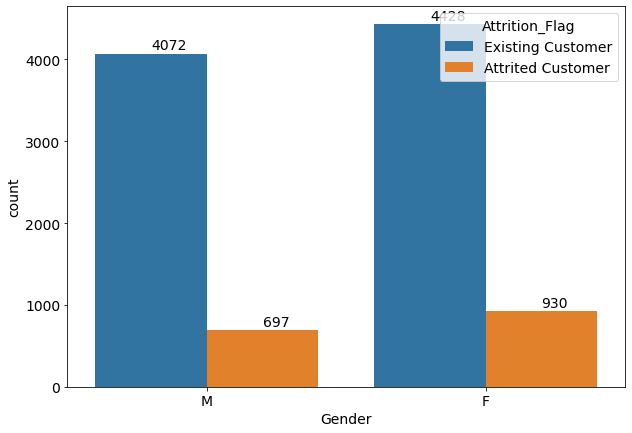

In [6]:
plt.figure(figsize=(10, 7))
plot = sns.countplot(x=df['Gender'], hue=df['Attrition_Flag'])

for p in plot.patches:
    print(p)
    plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height() + 50))
plt.show()

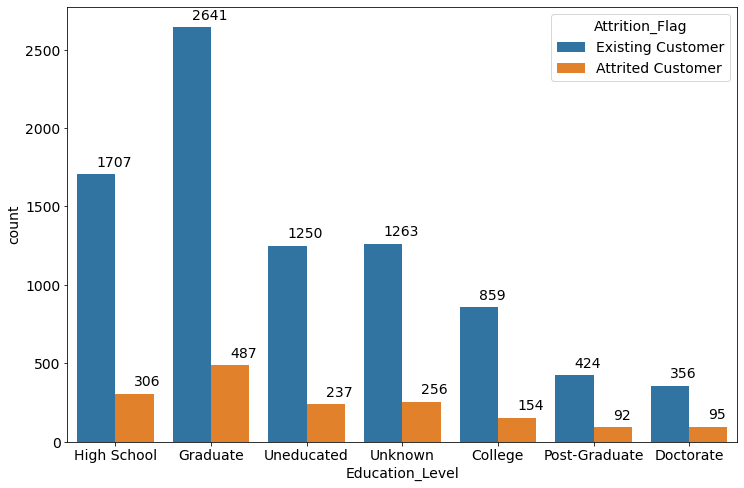

In [7]:
plt.figure(figsize=(12, 8))
plot = sns.countplot(x=df['Education_Level'], hue=df['Attrition_Flag'])

for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height() + 50))
#     plt.xticks(rotation=90)
plt.show()

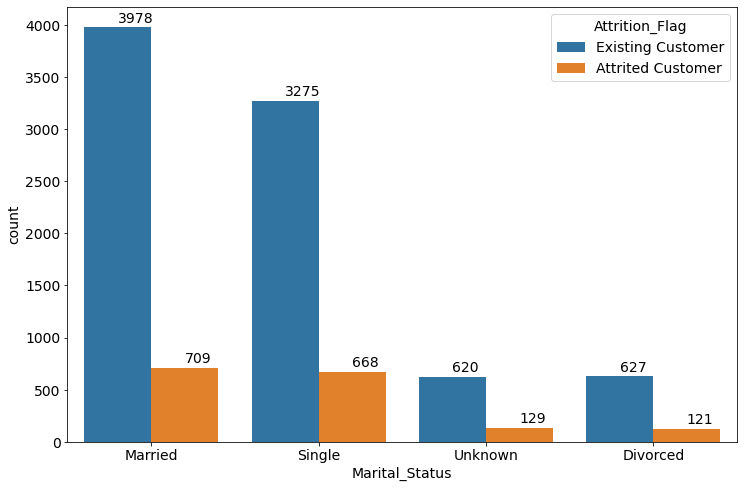

In [8]:
plt.figure(figsize=(12, 8))
plot = sns.countplot(x=df['Marital_Status'], hue=df['Attrition_Flag'])

for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height() + 50))
plt.show()

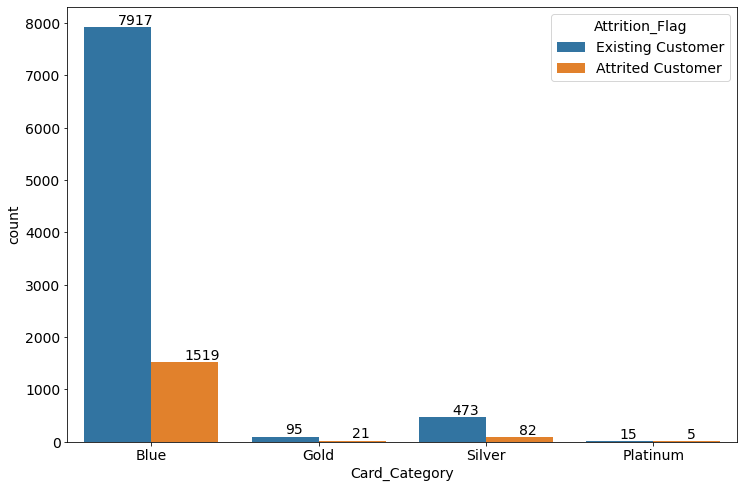

In [9]:
plt.figure(figsize=(12, 8))
plot = sns.countplot(x=df['Card_Category'], hue=df['Attrition_Flag'])

for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height() + 50))
plt.show()

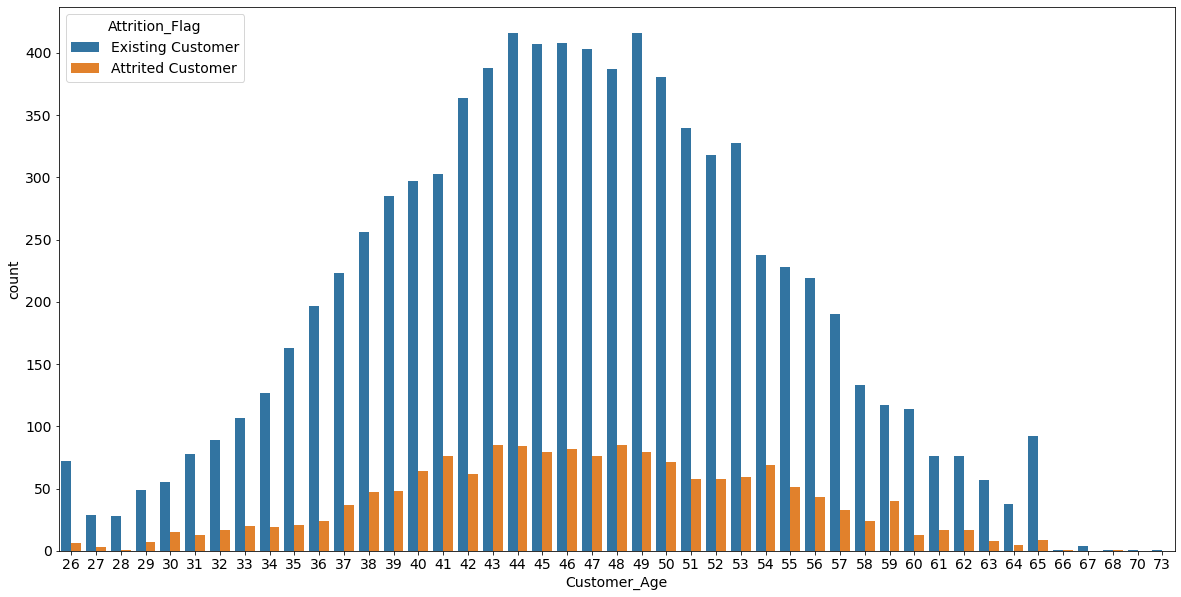

In [10]:
plt.figure(figsize=(20, 10))
plot = sns.countplot(x=df['Customer_Age'], hue=df['Attrition_Flag'])

# for p in plot.patches:
#     plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height() + 50))
plt.show()

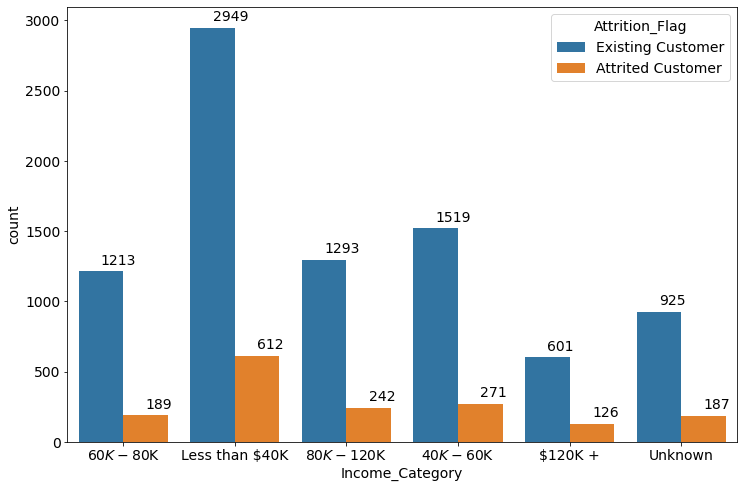

In [11]:
plt.figure(figsize=(12, 8))
plot = sns.countplot(x=df['Income_Category'],hue=df['Attrition_Flag'])

for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height() + 50))
plt.show()

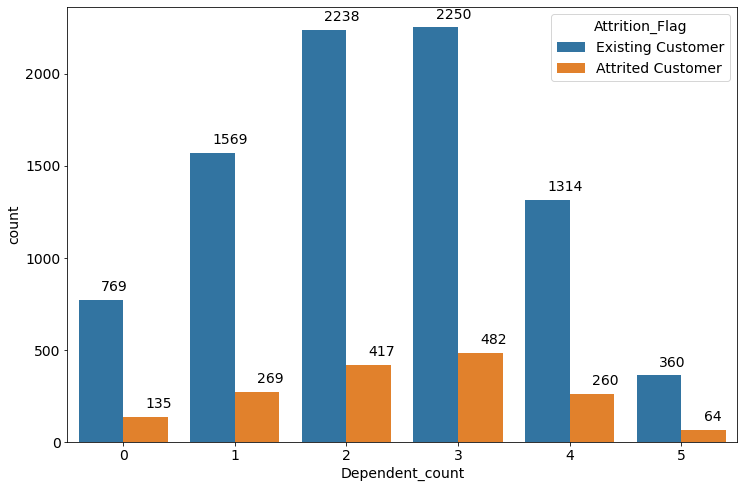

In [12]:
plt.figure(figsize=(12, 8))
plot = sns.countplot(x=df['Dependent_count'],hue=df['Attrition_Flag'])

for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height() + 50))
plt.show()

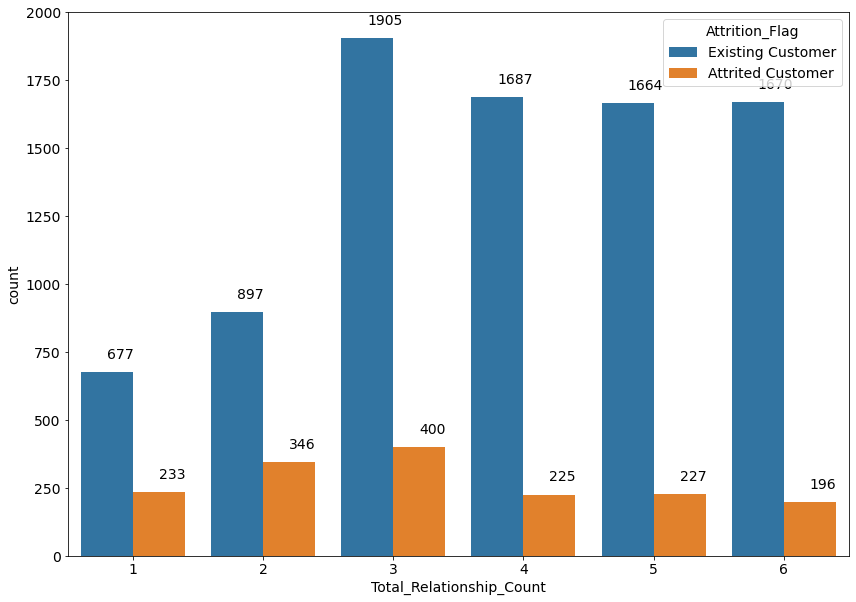

In [13]:
plt.figure(figsize=(14, 10))
plot = sns.countplot(x=df['Total_Relationship_Count'],hue=df['Attrition_Flag'])

for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height() + 50))
plt.show()

In [14]:
df.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Attrition_Flag   10127 non-null  object
 1   Gender           10127 non-null  object
 2   Education_Level  10127 non-null  object
 3   Marital_Status   10127 non-null  object
 4   Income_Category  10127 non-null  object
 5   Card_Category    10127 non-null  object
dtypes: object(6)
memory usage: 474.8+ KB


## Data Preprocessing

- **Encoding object columns to numerical**

In [15]:
df.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Attrition_Flag   10127 non-null  object
 1   Gender           10127 non-null  object
 2   Education_Level  10127 non-null  object
 3   Marital_Status   10127 non-null  object
 4   Income_Category  10127 non-null  object
 5   Card_Category    10127 non-null  object
dtypes: object(6)
memory usage: 474.8+ KB


In [36]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace({
    'Attrited Customer': 0.0,
    'Existing Customer': 1.0
})
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1.0,45,1,3,2,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,1.0,49,0,5,4,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,1.0,51,1,3,4,2,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,1.0,40,0,4,2,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,1.0,40,1,3,1,2,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1.0,50,1,2,4,1,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,0.0,41,1,2,0,3,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,0.0,44,0,1,2,2,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,0.0,30,1,2,4,0,2,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [34]:
ord_enc = OrdinalEncoder(dtype=np.int64)
df['Gender'] = ord_enc.fit_transform(df['Gender'].values.reshape(-1, 1))
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,1,3,2,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,0,5,4,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,1,3,4,2,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,0,4,2,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,1,3,1,2,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,1,2,4,1,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,1,2,0,3,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,0,1,2,2,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,1,2,4,0,2,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [18]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [19]:
df['Education_Level'] = df['Education_Level'].replace({
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
})
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,1,3,2,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,0,5,4,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,1,3,4,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,0,4,2,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,1,3,1,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,1,2,4,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,1,2,0,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,0,1,2,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,1,2,4,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [20]:
df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [21]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Unknown': 0,
    'Single': 1,
    'Married': 2,
    'Divorced': 3,
})
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,1,3,2,2,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,0,5,4,1,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,1,3,4,2,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,0,4,2,0,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,1,3,1,2,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,1,2,4,1,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,1,2,0,3,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,0,1,2,2,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,1,2,4,0,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [22]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [23]:
df['Income_Category'] = df['Income_Category'].replace({
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
})
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,1,3,2,2,3,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,0,5,4,1,1,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,1,3,4,2,4,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,0,4,2,0,1,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,1,3,1,2,3,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,1,2,4,1,2,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,1,2,0,3,2,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,0,1,2,2,1,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,1,2,4,0,2,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [24]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [25]:
df['Card_Category'] = df['Card_Category'].replace({
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3,
})
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,1,3,2,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,0,5,4,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,1,3,4,2,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,0,4,2,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,1,3,1,2,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,1,2,4,1,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,1,2,0,3,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,0,1,2,2,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,1,2,4,0,2,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## Training Model

In [26]:
predictors = df.loc[:, df.columns != 'Attrition_Flag'].columns.tolist()

In [51]:
from sklearn.linear_model import (
    LogisticRegressionCV, LogisticRegression
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Scaling data

In [28]:
def standardise(df, cols=df.columns):
    return StandardScaler().fit_transform(df[cols])

def normalise(df, cols=df.columns):
    return MinMaxScaler().fit_transform(df[cols])

### Assesing Model

In [29]:
def print_metrics(y_test, y_pred):
    print(
        f'Accuracy: {accuracy_score(y_test, y_pred)}\n' +
        f'Recall: {recall_score(y_test, y_pred)}\n' +
        f'Precision: {precision_score(y_test, y_pred)}\n' +
        f'F1: {f1_score(y_test, y_pred)}\n'
    )

In [76]:
dff = df.copy()

X_train, X_test, y_train, y_test = train_test_split(
    dff[predictors], dff['Attrition_Flag'],
    test_size=20, random_state=9
)
model = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [77]:
print_metrics(y_test, y_pred)

Accuracy: 0.75
Recall: 1.0
Precision: 0.75
F1: 0.8571428571428571



In [79]:
confusion_matrix(y_test, y_pred)

array([[ 0,  5],
       [ 0, 15]], dtype=int64)

In [83]:
classification_report(y_test, y_pred, target_names=['Existing', 'Attrited'])

'              precision    recall  f1-score   support\n\n    Existing       0.00      0.00      0.00         5\n    Attrited       0.75      1.00      0.86        15\n\n    accuracy                           0.75        20\n   macro avg       0.38      0.50      0.43        20\nweighted avg       0.56      0.75      0.64        20\n'

In [84]:
dff = df.copy()

X_train, X_test, y_train, y_test = train_test_split(
    dff[predictors], dff['Attrition_Flag'],
    test_size=20, random_state=9
)
model = LogisticRegressionCV(n_jobs=-1).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
print_metrics(y_test, y_pred)

Accuracy: 0.75
Recall: 1.0
Precision: 0.75
F1: 0.8571428571428571



In [86]:
confusion_matrix(y_test, y_pred)

array([[ 0,  5],
       [ 0, 15]], dtype=int64)

In [87]:
classification_report(y_test, y_pred, target_names=['Existing', 'Attrited'])

e:\documents\projects and scripts\python scripts\venv\mlvenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n    Existing       0.00      0.00      0.00         5\n    Attrited       0.75      1.00      0.86        15\n\n    accuracy                           0.75        20\n   macro avg       0.38      0.50      0.43        20\nweighted avg       0.56      0.75      0.64        20\n'

In [88]:
dff = df.copy()

X_train, X_test, y_train, y_test = train_test_split(
    dff[predictors], dff['Attrition_Flag'],
    test_size=20, random_state=9
)
model = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [89]:
print_metrics(y_test, y_pred)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1: 1.0



In [90]:
confusion_matrix(y_test, y_pred)

array([[ 5,  0],
       [ 0, 15]], dtype=int64)

In [91]:
classification_report(y_test, y_pred, target_names=['Existing', 'Attrited'])

'              precision    recall  f1-score   support\n\n    Existing       1.00      1.00      1.00         5\n    Attrited       1.00      1.00      1.00        15\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

In [96]:
dff = df.copy()

X_train, X_test, y_train, y_test = train_test_split(
    dff[predictors], dff['Attrition_Flag'],
    test_size=20, random_state=9
)
model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
print_metrics(y_test, y_pred)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1: 1.0



In [98]:
confusion_matrix(y_test, y_pred)

array([[ 5,  0],
       [ 0, 15]], dtype=int64)

In [99]:
classification_report(y_test, y_pred, target_names=['Existing', 'Attrited'])

'              precision    recall  f1-score   support\n\n    Existing       1.00      1.00      1.00         5\n    Attrited       1.00      1.00      1.00        15\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

In [100]:
dff = df.copy()

X_train, X_test, y_train, y_test = train_test_split(
    dff[predictors], dff['Attrition_Flag'],
    test_size=20, random_state=9
)
model = KNeighborsClassifier(n_jobs=-1).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [101]:
print_metrics(y_test, y_pred)

Accuracy: 0.75
Recall: 1.0
Precision: 0.75
F1: 0.8571428571428571



In [102]:
confusion_matrix(y_test, y_pred)

array([[ 0,  5],
       [ 0, 15]], dtype=int64)

In [103]:
classification_report(y_test, y_pred, target_names=['Existing', 'Attrited'])

e:\documents\projects and scripts\python scripts\venv\mlvenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n    Existing       0.00      0.00      0.00         5\n    Attrited       0.75      1.00      0.86        15\n\n    accuracy                           0.75        20\n   macro avg       0.38      0.50      0.43        20\nweighted avg       0.56      0.75      0.64        20\n'

## Summary

**Throughout the time I've worked on this dataset I performed EDA and Data Preprocessing**
<br>
**At the end, I trained different models**
<br>
**Results can obviously still be improved by tweaking predictor columns, scaling data and configuring each models hyperparameters**